# LINMA1702 - Projet 'Démixage d’une image hyperspectrale' - v1.1
## Description générale
<div class="alert alert-block alert-warning">Ce projet a pour objectif l'étude d'une technique d'analyse d'images hyperspectrales basée sur l'optimisation linéaire.</div>

Une image couleur contient l’information correspondant à trois longueurs d’ondes (rouge, vert et bleu). Les images hyperspectrales en sont une généralisation : elles comportent davantage de longueurs d’ondes (souvent plus d'une centaine) et permettent alors donc d’identifier des détails et des caractéristiques invisibles à l’oeil nu. Elles sont utilisées dans de nombreuses applications industrielles, militaires, environnementales et médicales, voir par exemple https://en.wikipedia.org/wiki/Hyperspectral_imaging.

Pour chaque pixel d’une image hyperspectrale, on mesure la quantité de lumière réfléchie dans chaque longueur d’onde, et on obtient ce qu’on appelle la signature spectrale du pixel. On a donc essentiellement une image différente pour chaque longueur d’onde. Voici un exemple d'une telle image hyperspectrale, capturée par satellite (source Wikipedia) 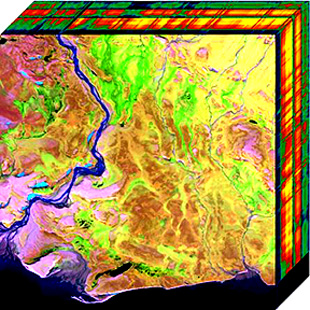

Soit une image hyperspectrale composée de $n \times n$ pixels, mesurée pour $m$ longueurs d'onde. Supposons qu'on connaisse la liste des différents matériaux présents dans cette image, au nombre de $r$. Supposons également que, pour chaque matériau, on dispose de sa signature spectrale comme défini ci-dessus. On fait à présent l'hypothèse simplificatrice que, pour chaque pixel de l'image, la signature spectrale mesurée sera une combinaison linéaire des signatures spectrales des différentes matériaux qui composent ce pixel. 

Dans la suite, on représentera chaque signature spectrales comme un vecteur colonne de $\mathbb{R}^m$ (un élément par longeur d'onde). L'hypothèse ci-dessus revient à considérer un mixage linéaire : la signature spectrale de chaque pixel est une combinaison linéaire des signatures spectrales des $r$ matériaux, et cette combinaison linéaire possède des coefficients positifs ou nuls qui représentent les quantités de ces matériaux. Ces quantités seront appelées les *abondances*, et il est crucial qu'elles soient positives ou nulles (par contre ce ne sont pas à proprement parler des proportions, et il n'est donc pas demandé que la somme des abondances pour un pixel soit égale à un). Ci-dessous une illustration de ce mixage pour un pixel :

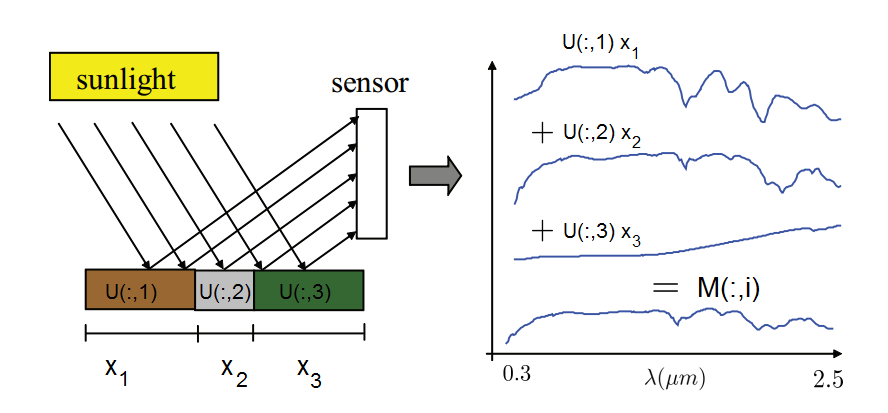

### Notations
Pour décrire mathématiquement le problème on utilisera les notations suivantes. L'ensembles des signatures spectrales des $r$ matériaux sont rassemblées dans une matrice $U$ de dimensions $m \times r$ (une colonne par matériau). L'ensembles des signatures spectrales des $n \times n$ pixels de l'image hyperspectrale sont rassemblées dans une matrice $M$ de dimensions $m \times n^2$ (une colonne par pixel). Enfin, on regroupera l'ensemble des abondances recherchées dans une matrice $X$ de dimensions $r \times n^2$, dont tous les éléments sont positifs ou nuls, et où chaque colonne correspond à un pixel et chaque ligne à un matériau. 

Ces notations sont compatibles avec la figure ci-dessus, où $M(:,i)$ représente une certaine colonne de $M$, c'est-à-dire le spectre d'un certain pixel, où $U(:,1)$, $U(:,2)$ et $U(:,3)$ sont les spectres de $r=3$ matériaux, et $x_1$, $x_2$ et $x_3$ sont les abondances de ces trois matériaux pour ce pixel (on aurait aussi pu écrire $X(1,i)$, $X(2,i)$ et $X(3,i)$ pour ces trois abondances, et elles forment la colonne $X(:,i)$).


### Problème de démixage

La plupart du temps les donnnées sont entachées de bruit de mesure ou d'imprécisions, de telle sorte que les sommes pondérées des signatures spectrales des matériaux ne peuvent reconstituer exactement les signatures spectrales des pixels. Afin d'estimer  les abondances de chaque pixel le plus précisément possible, on définit l'erreur de reconstruction comme la somme, pour chaque pixel et chaque longueur d'onde, de la valeur absolue entre la valeur mesurée et la valeur reconstruite à l'aide des abondances et des signatures des matériaux (cette somme comporte donc $n^2 \times m$ termes). L'objectif de notre problème de démixage sera de minimiser cette erreur de reconstruction.

### Données 
Deux jeux de données sont fournis. Ils correspondent tous les deux à la même image hyperspectrale du satellite Hubble, mais à des résolutions différentes ($33 \times 33$ et $128 \times 128$). Les signatures spectrales de huit matériaux présents dans les images sont aussi fournies.

*Sources* : Q. Zhang, H. Wang, R. Plemmons, and P. Pauca, *Tensor methods for hyperspectral data analysis: a space object material identification study*, J. Opt. Soc. Am. A 25(12), 3001–3012 (2008) pour les images, et communication personnelle de N. Gillis.

***
---
## Partie 1 : formulation et analyse du modèle
**Question 1(a)** : écrivez le problème de démixage d'une images hyperspectrale sous la forme d'un problème d'optimisation. Décrivez les variables, la fonction objectif et les contraintes. Utilisez la formulation la plus compacte possible, à l'aide de matrices et d'une certaine norme (laquelle ?). Donnez le nombre de variables et de contraintes en fonction des dimensions du problème $n$, $m$ et $r$.


**Réponse 1(a)** :
 - Les variables sont les abondances : $x_{jk}$ du matériau $j$ pour le pixel $k$, pour tout matériau $j\in {1,2,...,r}$ et pour tout pixel $k\in {1,2,...,n^2}$. Il y a donc $rn^2$ variables et elles sont regroupées dans la matrice des abondances $X\in \mathbb{R}^{r \times n^2}$.

 - La fonction objectif à minimiser est la norme de l'erreur totale de reconstruction, telle que définie ci-dessus : la somme des valeurs absolues des écarts entre valeur mesurée et valeur reconstruite, pour chaque pixel et chaque longueur d'onde. On écrit :
$$\min_{X \in \mathbb{R}^{r \times n^2}} \sum_{k=1}^{n^2} \sum_{i=1}^{m} |m_{ik} - \sum_{j=1}^{r} x_{jk} u_{ij}| $$

où on note $m_{ik}$ l'élément en ligne $i$ et colonne $k$ de la matrice $M$, \
et $u_{ij}$ l'élément en ligne $i$ et colonne $j$ de la matrice $U$.

 - En contraintes, on demande que les abondances soient des réels positifs : \
 $x_{jk}\geq 0 \quad \forall j\in {1,2,...,r}$ et $\forall k\in {1,2,...,n^2}$. Il y a donc $rn^2$ contraintes.

 - Le problème d'optimisation s'écrit finalement à l'aide de matrices : 
 
$$\min_{X \in \mathbb{R}^{r \times n^2}} \lVert  M-UX  \rVert_1 $$ 
sous contraintes 
$$x_{jk}\geq 0 \quad \forall j\in {1,2,...,r} \space \text{et} \space \forall k\in {1,2,...,n^2}$$
où la norme matricielle utilisée est définie comme la somme des valeurs absolues de tous les éléments de la matrice. (On peut vérifier qu'il s'agit bien d'une norme (norme 1)).

**Question 1(b)** : déterminez si le problème de démixage est convexe. Justifiez soigneusement votre réponse. 

Ensuite, considérez la situation où on remplacerait la norme utilisée dans la formulation 1(a) pour évaluer la qualité de la reconstruction par une norme quelconque : précisez si dans ce cas la convexité du problème serait modifiée ou non.

**Réponse 1(b)** :
Le problème de démixage est convexe, quelle que soit la norme utilisée. En effet, le problème est convexe s'il s'agit d'une minimisation, et que le domaine admissible et la fonction objectif sont tous deux convexes. On montre tout d'abord que c'est le cas pour ce problème.
- Il s'agit d'une minimisation.
- Une condition suffisante pour qu'un domaine admissible défini par des contraintes fonctionnnelles soit convexe est que : chaque fonction définissant une contrainte d'égalité soit affine, et chaque fonction définissant une inégalité soit concave.
Ici, on peut vérifier : $x_{jk}$ est une fonction affine pour les variables $x_{jk}$,  $\forall k\in {1,2,...,n^2}$ et  $\forall j\in {1,2,...,r}$, et est donc concave (et convexe). 
    
  Le domaine admissible est donc convexe.
- La fonction objectif est convexe car :
    - la fonction "valeur absolue" est convexe,
    - et la composée d'une fonction convexe avec un changement de variables linéaires est convexe. Donc $|m_{ik} - \sum_{j=1}^{r} x_{jk} u_{ij}|$ est convexe, pour chaque variable $x_{jk}$.
    - Enfin, la somme de fonctions convexes est convexe. La fonction objectif est donc bien convexe.

    
Si on remplaçait la norme 1 (utilisée ici) par une norme quelconque, le problème resterait convexe. En effet, il s'agirait toujours d'une minimisation, le domaine resterait inchangé (donc convexe), et la fonction objectif serait alors la norme de la matrice $U-MX$, pour la norme voulue. Comme toute fonction norme est convexe et que la convexité est conservée par les changements de variables linéaires (en particulier $U-MX$), le problème resterait convexe, quelle que soit la norme utilisée. 

(remarque : la suite de l'énoncé se base bien sur la norme décrite initialement, et pas sur une norme quelconque).

**Question 1(c)** : formulez le problème de démixage sous la forme d'un problème d'optimisation linéaire. Donnez le nombre de variables et de contraintes en fonction des dimensions du problème $n$, $m$ et $r$.

**Réponse 1(c)** :

**Question 1(d)** : le problème de démixage considéré possède un propriété particulière qui va permettre d'accélérer significativement sa résolution. En effet, plutôt que calculer globalement la solution optimale du problème, il est possible de décomposer le problème en un certain nombre de sous-problèmes complètement indépendants les uns des autres (ces sous-problèmes comportent chacun leurs propres variables, contraintes et fonctions objectif, et peuvent être résolus complètement indépendamment les uns des autres, donc chacun séparément). 

Décrivez ces sous-problèmes, donnez leur formulation, toujours sous forme de problème d'optimisation linéaire, et expliquez pourquoi ils sont indépendants. Donnez le nombre de sous-problèmes, et précisez quel est leur nombre de variables et de contraintes en fonction des dimensions du problème $n$, $m$ et $r$.

**Réponse 1(d)** :

***
---
## Partie 2 : résolution par optimisation linéaire et analyse de résultats

In [5]:
import numpy as np
from scipy.optimize import linprog
from scipy.io import loadmat
from matplotlib import pyplot as plt

#récupération des données dans Hubble-small.mat
data_small = loadmat('Hubble-small.mat')
U_small = data_small['U']
M_small = data_small['M']
n2_small = len(M_small[0]) #pixels
m_small = len(M_small) #longueurs d'onde
r_small = len(U_small[0])

#récupération des données dans Hubble-big.mat
data_big = loadmat('Hubble-big.mat')
U_big =U_small
M_big = np.transpose(data_big['M'])
n2_big = len(M_big[0])
m_big = len(M_big)
r_big = len(U_big[0])

print("Nombre de matériaux (identique): ", r_small,"et", r_big)
print("Nombre de fréquences: ", m_small, "et", m_big)
print("Nombre de pixels: ", n2_small,"et",n2_big)
print("\n")


Nombre de matériaux (identique):  8 et 8
Nombre de fréquences:  100 et 100
Nombre de pixels:  1089 et 16384




**Question 2(a)** : implémentez une fonction Python qui résout le problème de démixage selon l'approche décrite dans la partie 1. Cette fonction doit pouvoir être appelée de la façon suivante 

    abondances, erreur = demixage(image, materiaux)
    
où `image` est une matrice de taille $m \times n^2$ dont les colonnes contiennent les spectres des pixels (c'est la matrice $M$), et `materiaux` est une matrice $m \times r$ dont les colonnes contiennent les spectres (c'est la matrice $U$). Cette fonction renvoie une matrice `abondances` de taille $r \times n^2$ dont les colonnes contiennent les abondances de chaque pixel (c'est la matrice $X$), ainsi que l'`erreur` totale de reconstruction.
        
Votre code doit obligatoirement utiliser la décomposition identifiée à la question 1(d), et donc devra appeler la même sous-fonction pour résoudre chaque sous-problème indépendant. Cette sous-fonction utilisera le solver d'optimisation linéaire *linprog*. Expliquez comment sont constitués les matrices/vecteurs que vous lui fournirez.

<div class="alert alert-block alert-info">Code Python :</div>

In [ ]:

def demixage(image, materiaux, methode):
    """
    
    Args:
        image: array, correspond à la matrice M de l'énoncé
        materiaux: array, correspond à la matrice U de l'énoncé
        methode: string, méthode d'optimisation linéaire utilisée 
    Returns:
        abondances: array, correspond à la matrice X de l'énoncé
        erreur: float, correspond à la valeur optimale de la fonction objectif de l'énoncé
    
    """
    erreur = 0.0  # initialisation de l'erreur totale à 0
    n2 = len(image[0])
    m = len(image)
    r = len(materiaux[0])

    X = np.zeros((n2, r))  # initialisation du tableau d'inconnues, à transposer à la fin
    x = np.zeros(r+m)  # initialisation du vecteur d'inconnues pour les sous-problèmes
    T = np.zeros((n2, m))
    
    # Transpose pour manipuler les colonnes facilement (sans devoir faire de boucles)
    Mt = np.transpose(image)

    # vecteur des coeffs pour la fonction objectif
    c = np.zeros(r+m)
    c[r:] = 1  

    # création de la matrice A (coeffs pour les inégalités)
    I = np.identity(m)
    temp1 = np.concatenate((materiaux, -I), 1)
    temp2 = np.concatenate((-materiaux, -I), 1)
    A = np.concatenate((temp1, temp2), 0)

    b = np.zeros(m+m)

    for k in range(n2):
        b[:m] = Mt[k]
        b[m:] = -Mt[k]
        # résolution par linprog
        res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method=methode)
        erreur += res.fun
        X[k] = res.x[:r]
        T[k] = res.x[r:]
    abondances = np.transpose(X)

    return abondances, erreur, T

**Question 2(b)** : appliquez votre code aux deux jeux de données fournis. Explorez les différentes possibilités d'algorithme de résolution proposées (paramètre *method* de `linprog`), et sélectionnez la méthode la plus performante. Commentez les temps de calcul pour les deux jeux de données, les erreurs de reconstruction totales ainsi que l'erreur moyenne par pixel et/ou par fréquence.

In [ ]:
import time

methods_times = np.zeros(6)

#------------------------------------
# méthode utilisée = interior-point
#------------------------------------
startTime = time.time()
X_small_interior_point, erreur_small_interior_point, erreurs = demixage(M_small, U_small, "interior-point")

time_small_interior_point = (time.time() - startTime)
print("Temps de calcul avec méthode interior-point = ", time_small_interior_point)
methods_times[0] = time_small_interior_point



>>>Hubble-small.mat<<<
nombre de matériaux r:  8
nombre de fréquences m:  100
nombre de pixels n2:  1089




<ipython-input-35-fe5bc82ef3ec>:41: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method=methode)
<ipython-input-35-fe5bc82ef3ec>:41: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None), method=methode)
<ipython-input-35-fe5bc82ef3ec>:41: OptimizeWarning: Solving system with option 'sym_pos':False failed. This may happen occasionally, especially as the solution is approached. However, if you see this frequently, your problem may be numerically challenging. If you cannot improve the formulation, consider setting 'l

Temps de calcul avec méthode interior-point =  119.03526258468628


In [ ]:
#------------------------------------
# méthode utilisée = simplex
#------------------------------------
startTime = time.time()
X_small_simplex, erreur_small_simplex, T_simplex = demixage(M_small, U_small, "simplex")

time_small_simplex = (time.time() - startTime)
print("Temps de calcul avec méthode simplex = ", time_small_simplex)

In [ ]:
methods_times[1] = 1198.350210905075

In [ ]:
#------------------------------------
# méthode utilisée = revised-simplex
#------------------------------------
startTime = time.time()
X_small_rev_sim, erreur_small_rev_sim, T_rev_sim = demixage(M_small, U_small, "revised simplex")

time_small_rev_sim = (time.time() - startTime)
print("Temps de calcul avec méthode revised simplex = ", time_small_rev_sim)

In [ ]:
methods_times[2] = 443.4930536746979

In [ ]:
#------------------------------------
# méthode utilisée = highs-ds
#------------------------------------
startTime = time.time()
X_small_HDS, erreur_small_HDS, T_HDS = demixage(M_small, U_small, "highs-ds")

time_small_HDS = (time.time() - startTime)
print("Temps de calcul avec méthode highs-ds = ", time_small_HDS)

In [ ]:
methods_times[3] = 0

In [ ]:
#------------------------------------
# méthode utilisée = highs-ipm
#------------------------------------
startTime = time.time()
X_small_HIPM, erreur_small_HIPM, T_HIPM = demixage(M_small, U_small, "highs-ipm")

time_small_HIPM = (time.time() - startTime)
print("Temps de calcul avec méthode highs-ipm = ", time_small_HIPM)

In [ ]:
methods_times[4] = 10.492473363876343

In [ ]:
#------------------------------------
# méthode utilisée = highs
#------------------------------------
startTime = time.time()
X_small_highs, erreur_small_highs, T_highs = demixage(M_small, U_small, "highs")

time_small_highs = (time.time() - startTime)
print("Temps de calcul avec méthode highs = ", time_small_highs)

In [ ]:
methods_times[5] = 0

In [ ]:
min_time = methods_times.min()
best_meth = methods_times.argmin()
print("la méthode la plus performante est donc: ", best_meth) #à compléter après analyse du graphe
print("\n")

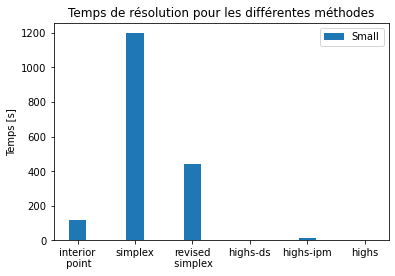

In [ ]:
# Graphe
meth = ['interior\n point', 'simplex', 'revised\n simplex', 'highs-ds', 'highs-ipm', 'highs']
times = methods_times
x_axis = np.arange(6)
#ax.bar(meth,methods_times)
plt.bar(x_axis, times, width=0.3, label = 'Small')
#plt.bar(x_axis +0.15, 2*times, width=0.3, label = 'Big')
plt.xticks(x_axis, meth)
plt.title("Temps de résolution pour les différentes méthodes")
plt.ylabel('Temps [s]')
plt.legend()
plt.show()


In [ ]:
for i in range(100) :
    print(np.transpose(X_small_interior_point)[i])
    print("\n")

print(erreur_small_interior_point)

[2.20810126e-14 5.05336077e-14 8.54641571e-15 1.94481493e-14
 6.25321792e-13 7.89595203e-12 6.55385346e-14 5.58161599e-14]


[1.88511019e-12 1.91589550e-12 4.32055304e-03 4.07198605e-12
 1.97793346e-12 5.23459819e-12 4.10087989e-12 1.80136215e-12]


[2.44383600e-11 6.06018437e-10 1.16693852e-10 3.45738567e-02
 1.95558982e-10 5.79773681e-10 2.20801163e-10 1.11126173e-02]


[5.56800343e-14 3.27471873e-14 1.26070890e-14 2.62953067e-14
 2.17579803e-02 7.74525839e-14 8.92116270e-15 3.01161725e-14]


[6.67640634e-11 9.44048853e-11 1.89847242e-10 4.30613981e-10
 1.67630331e-02 1.76948111e-10 1.65396971e-09 2.49821161e-10]


[9.50609886e-15 2.15735826e-14 1.27536061e-02 1.37425753e-14
 8.23657741e-12 1.43139236e-14 1.09627401e-14 1.15602767e-14]


[3.52236929e-13 8.34444630e-03 3.73448115e-12 2.22064920e-13
 2.69206228e-12 3.21768233e-13 3.28326346e-13 4.64274577e-13]


[3.90831880e-12 8.85976600e-13 9.42707265e-03 8.99491497e-13
 7.49932188e-13 9.71043024e-13 1.17268286e-12 1.34501055e-12]




In [ ]:
for i in range(100) :
    print(np.transpose(X_small_HIPM)[i])
    print("\n")

print(erreur_small_HIPM)

NameError: name 'X_small_HIPM' is not defined

In [ ]:
print(np.transpose(erreurs)[0])

In [ ]:
#code appliqué au jeu de données Hubble-big.mat
print(">>>Hubble-big.mat<<<")
#print("nombre de matériaux r: ", r_big) voir erreur dans la première cellule (c'est quoi les clefs de data_big??)
#print("nombre de fréquences m: ", m_big)
#print("nombre de pixels n2: ", n2_big)
print("\n")

#méthode utilisée = interior-point
#X_big_interior_point, erreur_big_interior_point = demixage(M_big, U_big, "interior-point")
time_big_interior_point = 0 #à modifier
print("temps de calcul avec interior-point = ", time_big_interior_point)
#méthode utilisée = ... @Sophie
#...

#plot du temps en fonction de la méthode
print("la méthode la plus performante est donc: ") #à compléter après analyse du graphe

>>>Hubble-big.mat<<<


temps de calcul avec interior-point =  0
la méthode la plus performante est donc: 


In [ ]:
#comparaison entre les deux jeux de données
#à compléter

**Question 2(c)** : affichez pour quelques longueurs d'ondes les images reconstruites, et comparez aux images fournies en entrée. Comparez également visuellement le spectre de quelques pixels de l'image hyperspectrale fournie au spectre correspondant dans l'image reconstruite. Commentez vos résultats.

In [ ]:
#matrice des signatures spectrales des pixels reconstruites pour Hubble-small.mat
image_small_reconstruite = U_small@X_small_interior_point
#liste des index des pixels
pixels_small = np.arange(n2_small)

#matrice des signatures spectrales des pixels reconstruites pour Hubble-big.mat
#image_big_reconstruite = U_big@X_big_interior_point
#liste des index des pixels
#pixels_big = np.arange(n2_big)

In [ ]:
def compare_image(wave_length, M, image_reconstruite, pixels):
    """
    Renvoie les graphes de la quantité de lumière réfléchie originale et reconstruite en fonction des pixels pour une longueur d'onde donnée.
    
    Arguments
    ---------
    wave_length: int, index correspondant aux lignes dans UX et M
    M: tableau numpy, matrice des signatures spectrales des pixels originales
    image_reconstruite: tableau numpy, matrice des signatures spectrales des pixels reconstruites
    pixels: numpy array, liste des index correspondant aux colonnes dans UX et M

    Retourne
    --------
    plot (pixel, quantité de lumière réfléchie originale et reconstruite) pour une longueur d'onde donnée correspondant à l'index wave_length
    
    """
    
    #création de la figure
    plt.figure(figsize=(25, 8))
    #titre
    plt.title("Comparaison entre image originale et reconstruite pour la longueur d'onde d'index "+str(wave_length))
    #axes
    plt.xlabel("pixel")
    plt.ylabel("quantité de lumière réfléchie")
    #plot des quantités de lumière réfléchie originales
    plt.scatter(pixels, M[wave_length])
    #plot des quantités de lumière réfléchie reconstruites
    plt.scatter(pixels, image_reconstruite[wave_length])
    #légende des graphes
    plt.legend(['quantités originales', 'quantités reconstruites'])
    
    plt.show()


Pour Hubble-small.mat, voici l'affichage de quelques comparaisons pour différentes longueurs d'onde entre l'image originale et reconstruite:

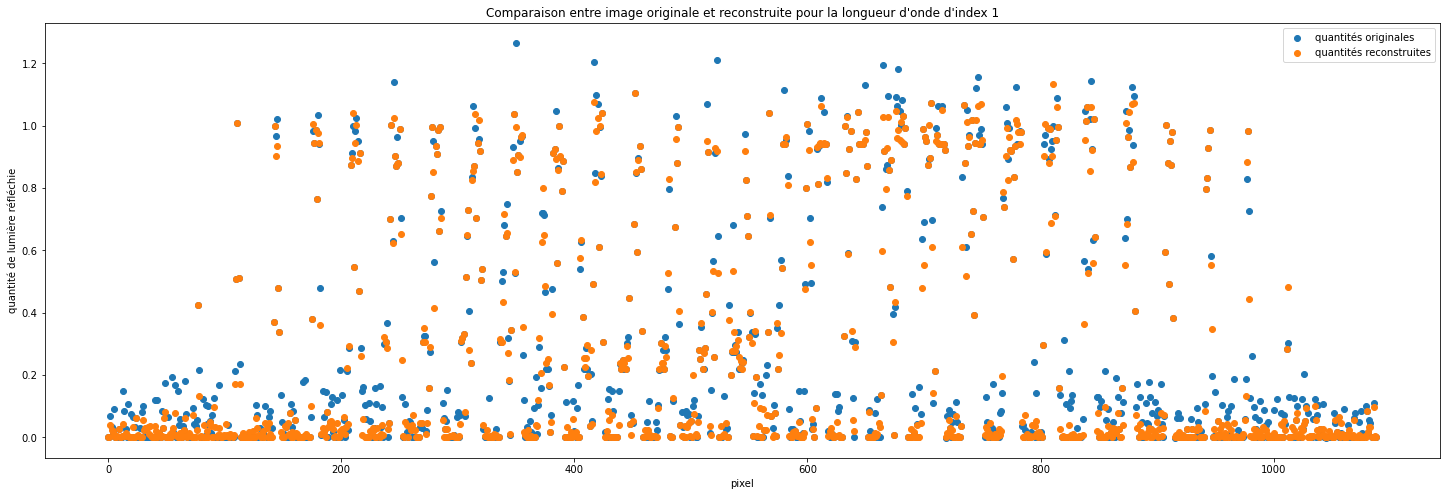

In [ ]:
#Pour Hubble-small.mat: 0<=wave_length<=99

#comparaison pour wave_length=1 entre image originale et reconstruite
compare_image(1, M_small, image_small_reconstruite, pixels_small)

De même, pour Hubble-big.mat:

In [ ]:
#Pour Hubble-big.mat: 

#comparaison pour wave_length=1 entre image originale et reconstruite dans "Hubble-big.mat"
#compare_image(1, M_big, image_big_reconstruite, pixels_big)

In [ ]:
#liste des index des longueurs d'onde pour Hubble-small.mat
frequences_small = np.arange(m_small)

#liste des index des longueurs d'onde pour Hubble-big.mat
#frequences_big = np.arange(m_big)

In [ ]:
def compare_spectrum(pixel, M, image_reconstruite, frequences):
    """
    Renvoie les graphes de la quantité de lumière réfléchie originale et reconstruite en fonction des longueurs d'onde pour un pixel donné.
    
    Arguments
    ---------
    pixel: int, index correspondant aux colonnes UX et M
    M: tableau numpy, matrice des signatures spectrales des pixels originales
    image_reconstruite: tableau numpy, matrice des signatures spectrales des pixels reconstruites
    frequences: numpy array, liste des index correspondant aux lignes dans UX et M

    Retourne
    --------
    plot (longueur d'onde, quantité de lumière réfléchie originale et reconstruite) pour un pixel donné correspondant à l'index pixel
    
    """
    #création de la figure
    plt.figure(figsize=(25, 8))
    #titre
    plt.title("Comparaison entre signature spectrale originale et reconstruite pour le pixel d'index "+str(pixel))
    #axes
    plt.xlabel("longueur d'onde")
    plt.ylabel("quantité de lumière réfléchie")
    #plot des quantités de lumière réfléchie originales
    plt.scatter(frequences, np.transpose(M)[pixel])
    #plot des quantités de lumière réfléchie reconstruites
    plt.scatter(frequences, np.transpose(image_reconstruite)[pixel])
    #légende des graphes
    plt.legend(['quantités originales', 'quantités reconstruites'])
    
    plt.show()
    

Pour Hubble-small.mat, voici l'affichage de quelques comparaisons pour différents pixels entre la signature spectrale originale et reconstruite:

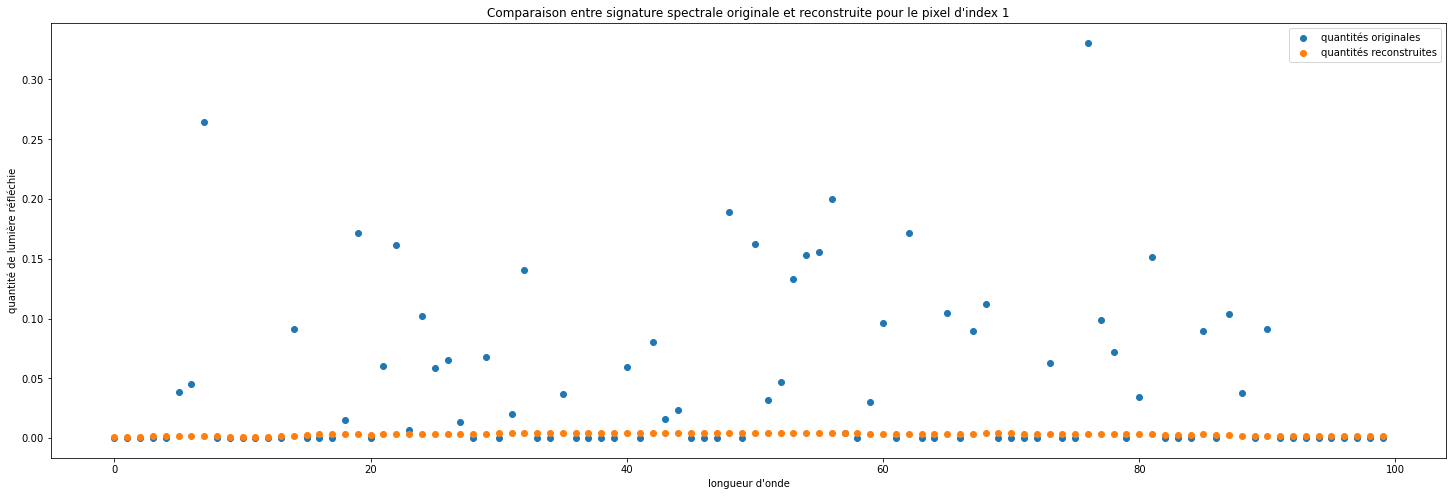

In [ ]:
#Pour Hubble-small.mat: 0<=pixel<=1088

#comparaison pour pixel=1 entre signature spectrale originale et reconstruite 
compare_spectrum(1, M_small, image_small_reconstruite, frequences_small)

De même, pour Hubble-big.mat:

In [ ]:
#Pour Hubble-big.mat:

#comparaison pour pixel=1 entre signature spectrale originale et reconstruite
#compare_spectrum(1, M_big, image_big_reconstruite, frequences_big)

Commentaires:

<div class="alert alert-block alert-info">[votre réponse]</div>

**Question 2(d)** : examinez l'ensemble des erreurs de recontructions, avec une valeur de l'erreur pour chaque paire (pixel,fréquence), et commentez leur répartition, en particulier la présence de valeurs nulles. En vous aidant du cours, tentez de fournir une explication intuitive de ce phénomène.

***
---
## Partie 3 : reconstruction simultanée des abondances et des spectres des matériaux
Dans cette dernière partie, on fait l'hypothèse qu'**on ne dispose plus des spectres des matériaux** présents dans l'image hyperspectrale. On cherche donc à la fois les abondances des pixels **et** les spectres des matériaux, et on suppose uniquement qu'on connaît le nombre de matériaux. A part cette nouvelle hypothèse, le reste du problème est changé.

**Question 3(a)** : formulez ce nouveau problème sous la forme d'un problème d'optimisation. Décrivez les variables, la fonction objectif et les contraintes. Utilisez la formulation la plus compacte possible, à l'aide de matrices et d'une certaine norme. Donnez le nombre de variables et de contraintes en fonction des dimensions du problème $n$, $m$ et $r$.

<div class="alert alert-block alert-info">[votre réponse]</div>

**Question 3(b)** : déterminez si ce nouveau problème de démixage et d'identification des spectres est convexe. Justifiez soigneusement votre réponse. 

<div class="alert alert-block alert-info">[votre réponse]</div>

Pour résoudre ce problème on va utiliser une technique de minimisation alternée, très utilisée pour résoudre ce type de problème. Elle consiste à partir d'une estimation initiale aléatoire des spectres des matériaux et à calculer, et à calculer les abondances optimales en fonction de cette estimation : il s'agit donc exactement du même problème que celui qui a été résolu dans les parties 1 et 2. Ensuite, on fixe ces abondances et on calcule les spectres optimaux correspondant à ces abondances, c'est-à-dire les spectres qui conduisent à l'erreur de reconstruction minimale (on rappelle qu'un spectre doit être composé d'éléments positifs ou nuls). On répète ensuite cette paire d'optimisations successives (abondances en fonction de spectres fixés, puis spectres en fonction d'abondances fixées) jusqu'à la convergence vers une solution.

**Question 3(c)** : expliquez comment il est possible de résoudre le second problème d'optimisation, celui qui optimise les spectres en fonction d'abondances fixées. Il n'est pas nécessaire de créer une nouvelle formulation : en effet, il est possible de ramener ce problème au problème résolu dans les parties 1 et 2 à l'aide d'une observation judicieuse. *Indice* : pensez à la transposée.

<div class="alert alert-block alert-info">[votre réponse]</div>

**Question 3(d)** : implémentez l'algorithme de minimisation alternée conçu au point précédent. Votre code doit pouvoir être appelé de la façon suivante 

    abondances, materiaux, erreur = demixage_sans_spectres(image)

et devra faire appel au code proposé à la partie 2 (fonction `demixage`). Proposez un critère d'arrêt simple.

<div class="alert alert-block alert-info">[votre réponse]</div>

**Question 3(e)** : appliquez cet algorithme sur le petit jeu de données uniquement, en supposant l'existence de huit matériaux. Affichez l'évolution de l'erreur de reconstruction au fil des optimisations successives. Commentez le résultat final obtenu de façon : erreurs de recontruction finales, affichage de quelques images et de spectres, et comparaison avec les résultats de la partie 2 (en particulier les spectres reconstruits).

<div class="alert alert-block alert-info">[votre réponse]</div>

**Question 3(f)** : appliquez cet algorithme au même petit jeu de données mais en faisant cette fois varier le nombre de matériaux. Commentez ces nouveaux résultats (comparez les entre eux ainsi qu'à la solution de la partie 2).

<div class="alert alert-block alert-info">[votre réponse]</div>

**Question BONUS** : *(permet d'obtenir jusqu'à 2 points en plus sur 20)* <u>à venir</u>

***
---
## Consignes et conseils
- Le projet se réalise par groupe de trois étudiants (cf. groupes constitués sur Moodle). 

- L'assistant responsable du projet est Guillaume Van Dessel. Toutes les  questions sur le projet doivent être posées via Moodle dans le forum prévu pour le projet (et pas par message/mail individuel). Une ou deux permanences pourront être prévues à votre demande.

- Le rapport décrivant le travail effectué est à fournir sous la forme d'un *notebook Python*. Dans ce notebook vous répondez aux questions posées  (il est possible d'utiliser des formules LaTeX, d'insérer des images, etc.), implémentez les modèles demandés (en les commentant), calculez puis présentez les résultats obtenus après résolution (avec des tableaux, graphiques, etc.) avant de les commenter. Il est aussi possible de structure votre code en modules. Expliquez également votre démarche, vos choix et vos hypothèses, incluez toute autre observation (ou commentaire) que vous jugez pertinente. 

- Réferez-vous si nécessaire aux transparents du cours, plus spécifiquement à ceux à propos d'optimisation linéaire. Il est inutile de ré-expliquer la théorie dans le rapport, et les propriétés vues peuvent être utilisées sans être démontrées.

- Les groupes peuvent échanger leurs réflexions, partager leurs idées et comparer leurs résultats. Ils ne peuvent pas recopier les raisonnements, les solutions ou les codes informatiques. L'utilisation de toute information ou aide extérieure doit obligatoirement être mentionnée dans le rapport, en citant la source.

- Le rapport est à remettre après six semaines, soit au plus tard le **vendredi 13 mai 2022** à minuit (soir), via Moodle, sous la forme d'une archive compressée contenant le notebook et tous les fichiers nécessaires pour le faire fonctionner (code Python, etc.), à l'exception des fichiers de données fournis (.mat). Le notebook doit contenir les cellules sous forme déjà évaluée (résultats, tableaux, graphiques, etc.), mais doit pouvoir également être ré-évalué en entier. 

- Organisez efficacement votre travail de groupe : il existe tâches qui peuvent s'effectuer indépendemment à l'intérieur de chaque partie.

<div class="alert alert-block alert-success">&#9650;
Commencez à travailler dès que possible, n'attendez pas les dernières semaines ! Appréhender et formuler le problème peut prendre du temps, de même que se familiariser avec les outils Python et les solveurs d'optimisation linéaire. Le rythme de travail suggéré est de consacrer une semaine pour chacune des trois parties et une dernière semaine à la finalisation et la relecture du rapport.</div>

### Changelog
- 2022-04-01 v1
- 2022-04-06 v1.1 : 
    - correction de quelques coquilles (entre autre : l'énoncé du 1b était répété inutilement dans 1c) 
    - notations : échange des matrices M et U pour être compatible avec la figure (M devient la matrice des pixels, et U la matrice des matériaux) + explication supplémentaire en lien avec la figure 
    - précision au 1c à propos de la norme alternative et suggestion au 1(a) d'utiliser une certaine norme dans la formulation
    - mention du fait que les propriétés vues au cours peuvent être utilisées sans être démontrées
    - mise en évidence (couleur) des parties à compléter